## This is the lab for "Machine Learning Course" 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe(include = 'all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV 4X4,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [6]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

Let's plot the numerical features

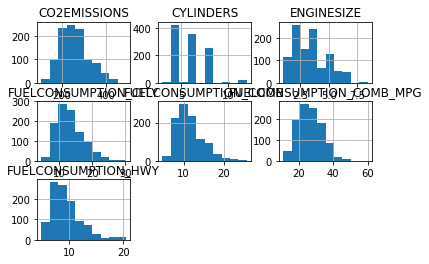

In [7]:
viz = cdf
viz.hist()
plt.show()

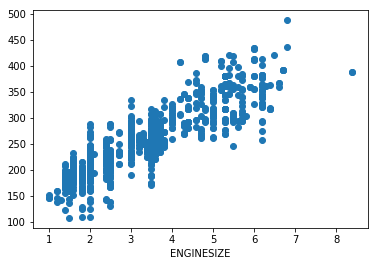

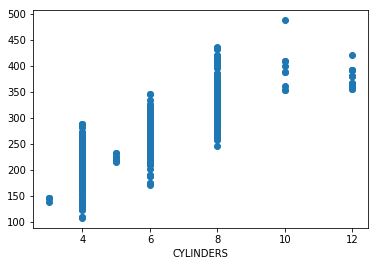

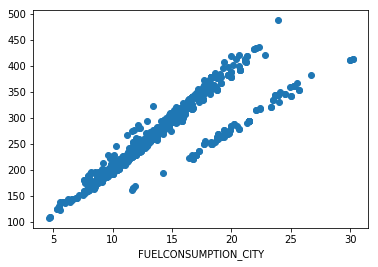

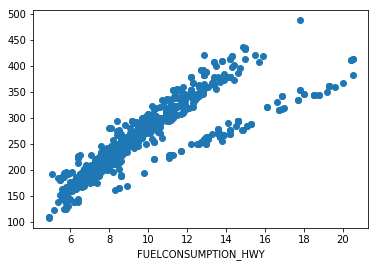

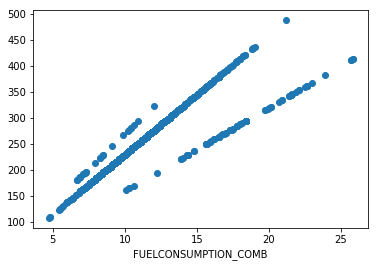

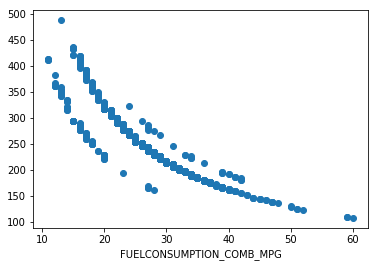

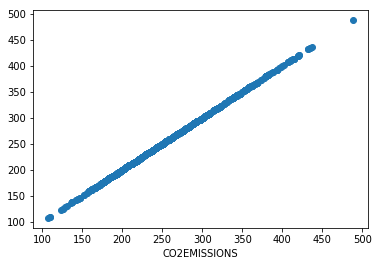

In [8]:
for i in cdf.columns:
    plt.scatter(cdf[i], df['CO2EMISSIONS'],)
    plt.xlabel(str(i))
    plt.show()

# Split the data manually

In [9]:
msk = np.random.rand(len(df))<0.8

In [10]:
train = cdf[msk]
test = cdf[~msk]
print('Size of training set: ', len(train))
print('Size of testing set: ', len(test))

Size of training set:  854
Size of testing set:  213


### Create visualizaton and build the model with training set (using only 1 features as "FUELCONSUMPTION_HWY")

In [11]:
x_train = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
x_test = np.asanyarray(test[['FUELCONSUMPTION_HWY']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

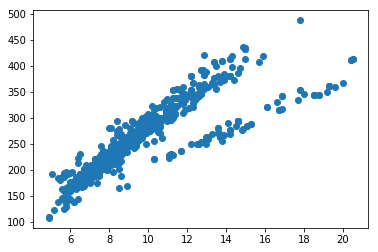

In [12]:
plt.scatter(x_train, y_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print('Coefficent:',lm.coef_)
print('Intercept:',lm.intercept_)

Coefficent: [[19.50760189]]
Intercept: [71.60323915]


In [16]:
y_hat = lm.predict(x_test)

Evaluation

In [17]:
from sklearn.metrics import r2_score
mae = np.mean((np.absolute(y_test - y_hat)))
mse = np.mean((np.square(y_test - y_hat)))
r2 = r2_score(y_test, y_hat)
print('Mean absolute error: ', mae)
print('Mean Square error: ', mse)
print('R2 value: ', r2)

Mean absolute error:  22.079376060834193
Mean Square error:  909.1140430672282
R2 value:  0.7294134140079505


---
---

## <font color = 'blue'>Lab for SVM and  Logistic Regression

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pylab as pl

In [21]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cell_samples.csv'
df = pd.read_csv(url)

In [22]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID             699 non-null int64
Clump          699 non-null int64
UnifSize       699 non-null int64
UnifShape      699 non-null int64
MargAdh        699 non-null int64
SingEpiSize    699 non-null int64
BareNuc        699 non-null object
BlandChrom     699 non-null int64
NormNucl       699 non-null int64
Mit            699 non-null int64
Class          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### <font color = 'red'>It seem like BareNuc has something wrong in one or few columns, let's drop it

In [36]:
df = df[pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype(int)
print(len(df))

683


In [31]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## Convert features into an array with "asarray"

In [41]:
x = np.asarray(df.iloc[:,1:-1])
x[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [43]:
y = np.asarray(df.Class)
y[:5]

array([2, 2, 2, 2, 2])

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 163)
print('Train size:', x_train.shape, y_train.shape)
print('Test size: ', x_test.shape, y_test.shape)

Train size: (546, 9) (546,)
Test size:  (137, 9) (137,)


In [51]:
from sklearn.svm import SVC

In [52]:
clf = SVC(kernel = 'rbf')
clf.fit(x_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
y_hat = clf.predict(x_test)
y_hat[:5]

array([4, 4, 4, 2, 2])

## Model evaluation

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[81,  6],
       [ 2, 48]])

In [60]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           2       0.98      0.93      0.95        87
           4       0.89      0.96      0.92        50

   micro avg       0.94      0.94      0.94       137
   macro avg       0.93      0.95      0.94       137
weighted avg       0.94      0.94      0.94       137



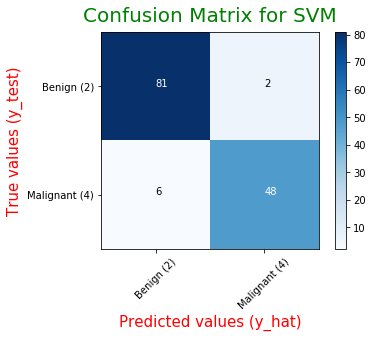

In [111]:
classes = ['Benign (2)', 'Malignant (4)']
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title('Confusion Matrix for SVM', fontsize  = 20, pad = 10, color = 'green')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == j :
            plt.text(i,j, cm[i,j], color = 'white')
        else:
            plt.text(i,j, cm[i,j], color = 'black')
plt.xlabel('Predicted values (y_hat)', fontsize = 15, color = 'red')
plt.ylabel('True values (y_test)', fontsize = 15, color = 'red')
plt.show()

### <font color = 'green'> Check the result with F1-Score and Jaccard index

In [113]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat,average = 'weighted')

0.9420418139181558

In [114]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_hat)

0.9416058394160584

In [116]:
clf = SVC(kernel = 'linear')
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [117]:
y_hat = clf.predict(x_test)

In [119]:
cm = confusion_matrix(y_test, y_hat)

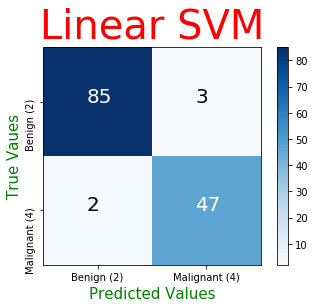

Classification report
              precision    recall  f1-score   support

           2       0.97      0.98      0.97        87
           4       0.96      0.94      0.95        50

   micro avg       0.96      0.96      0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

F1_score =  0.9634235999199503


In [153]:
plt.imshow(cm, cmap = plt.cm.Blues)
plt.xticks (tick_marks, classes)
plt.yticks(tick_marks, classes, rotation = 90)
plt.xlabel('Predicted Values', fontsize = 15, color = 'green')
plt.ylabel('True Vaues', fontsize = 15, color = 'green')
plt.colorbar()
plt.title('Linear SVM', fontsize = 40, pad = 10, color = 'red')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == j:
            plt.text(i-0.1,j, cm[i,j], color = 'white', fontsize = 20)
        else:
            plt.text(i-0.1,j, cm[i,j], color = 'black', fontsize = 20)
plt.show()
plt.close()

print('Classification report')
print(classification_report(y_test, y_hat))
print('F1_score = ', f1_score(y_test, y_hat, average = 'weighted'))